In [1]:
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

In [2]:
%pip install PyPDF2
import PyPDF2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
%pip install lexical-diversity
from lexical_diversity import lex_div as ld

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
f = open(r'animal-farm.pdf', 'rb')

In [5]:
animal_farm = PyPDF2.PdfFileReader(f)

In [6]:
animal_farm.getNumPages()

56

In [7]:
chapters = []

start = 4
end_chapters = [9, 14, 18, 21, 26, 31, 37, 44, 50, 56]
text = ""
for cn in range(0, 10):
  print(f'chapter {cn + 1}')
  text = ""
  for p in range(start, animal_farm.getNumPages()):
    print(f'\rPage:{p}')
    text += animal_farm.getPage(p).extract_text()
    if end_chapters[cn] - 1 == p:
      chapters.append(text)
      start = end_chapters[cn]
      break

chapter 1
Page:4
Page:5
Page:6
Page:7
Page:8
chapter 2
Page:9
Page:10
Page:11
Page:12
Page:13
chapter 3
Page:14
Page:15
Page:16
Page:17
chapter 4
Page:18
Page:19
Page:20
chapter 5
Page:21
Page:22
Page:23
Page:24
Page:25
chapter 6
Page:26
Page:27
Page:28
Page:29
Page:30
chapter 7
Page:31
Page:32
Page:33
Page:34
Page:35
Page:36
chapter 8
Page:37
Page:38
Page:39
Page:40
Page:41
Page:42
Page:43
chapter 9
Page:44
Page:45
Page:46
Page:47
Page:48
Page:49
chapter 10
Page:50
Page:51
Page:52
Page:53
Page:54
Page:55


In [8]:
print(chapters[1])

Chapter Two 
 
 
Three nights later old Major died peacefully in his sleep. His body was buried at the foot 
of the orchard.  
This was early in March. During the next three months there was much secret activity. 
Major's speech had given to the more intelligent animals on the farm a completely new 
outlook on life. They did not know when the Rebellion predicted by Major would take place, they had no reason for thinking that it would be within their own lifetime, but they saw clearly that it was their duty to prepare for it. The work of teaching and 
organising the others fell naturally upon the pigs, who were generally recognised as 
being the cleverest of the animals. Pre- eminent among the pigs were two young boars 
named Snowball and Napoleon, whom Mr. Jones was breeding up for sale. Napoleon was a large, rather fierce- looking Berkshire boar, the only Berkshire on the farm, not 
much of a talker, but with a reputation for getting his own way. Snowball was a more vivacious pig than

<h2>Functions</h2>
Define functions to process the text

In [9]:
def token_frequency(txt, not_include=[], only_include=[], verbos=False):
    if len(not_include) != 0 and len(only_include) != 0: 
        raise Exception('Cannot specify both "not_include" and "only_include"')
    words = dict()
    doc = nlp(txt)
    for token in doc:
        if token.pos_ in not_include: continue
        if len(only_include) != 0 and token.pos_ not in only_include: continue
        if nlp.vocab[token.lemma_].is_stop: continue
        if token.lemma_ not in words.keys():
            words[token.lemma_] = 1
        else: words[token.lemma_] += 1
        if verbos: print(f"{token.text:{16}} {token.pos_:{12}} {token.dep_:{12}} {token.lemma_:{16}} {spacy.explain(token.tag_)}")
    
    words = dict(sorted(words.items(), key=lambda item: item[1], reverse=True))
    return words

<h1>Chapter One</h1>
Let's try to process chapter one

In [10]:
chapter1_doc = nlp(chapters[0])

In [11]:
chapter1_doc.text

'Chapter One  \nM\nr. Jones, of the Manor Farm, had locked  the hen -houses for the night, but was too \ndrunk to remember to shut the popholes. With the ring of light from his lantern dancing \nfrom side to side, he lurched across the yard, kicked off his boots at the back door, drew himself a last glass of beer from the barrel in the scullery, and made his way up to bed, \nwhere Mrs. Jones was already snoring.  \nAs soon as the light in the bedroom went out there was a stirring and a fluttering all \nthrough the farm buildings. Word had gone round during the day that old Major, the prize Middle White boar, had had a strange dream on the previous night and wished to \ncommunicate it to the other animals. It had been agreed that they should all meet in the \nbig barn as soon as Mr. Jones was safely out of the way. Old Major (so he was always called, though the name under which he had been exhibited was Willingdon Beauty) was so highly regarded on the farm that everyone was quite ready 

In [12]:
words = token_frequency(chapters[0], not_include=['SPACE', 'PUNCT', 'NUM'], verbos=True)

Chapter          NOUN         nmod         chapter          noun, singular or mass
M                PROPN        compound     M                noun, proper singular
r.               PROPN        compound     r.               noun, proper singular
Jones            PROPN        nsubj        Jones            noun, proper singular
Manor            PROPN        compound     Manor            noun, proper singular
Farm             PROPN        pobj         Farm             noun, proper singular
locked           VERB         ROOT         lock             verb, past participle
hen              NOUN         dobj         hen              noun, singular or mass
-houses          NOUN         dobj         -house           noun, plural
night            NOUN         pobj         night            noun, singular or mass
drunk            ADJ          acomp        drunk            adjective (English), other noun-modifier (Chinese)
remember         VERB         advcl        remember         verb, base form

In [13]:
words

{'animal': 24,
 'comrade': 14,
 'come': 13,
 'life': 12,
 'old': 11,
 'Major': 10,
 'shall': 10,
 'Man': 10,
 'year': 9,
 'England': 9,
 'Jones': 8,
 'horse': 8,
 'beast': 8,
 'night': 7,
 'farm': 7,
 'day': 7,
 'dream': 7,
 'pig': 7,
 'dog': 7,
 'word': 7,
 'sing': 7,
 'long': 6,
 'begin': 6,
 'cow': 6,
 'song': 6,
 'soon': 5,
 'straw': 5,
 'Boxer': 5,
 'time': 5,
 'know': 5,
 'labour': 5,
 'enemy': 5,
 'rat': 5,
 'tune': 5,
 'hen': 4,
 'remember': 4,
 'bed': 4,
 'round': 4,
 'barn': 4,
 'lose': 4,
 'end': 4,
 'sheep': 4,
 'Clover': 4,
 'great': 4,
 'white': 4,
 'work': 4,
 'throat': 4,
 'live': 4,
 'let': 4,
 'man': 4,
 'draw': 3,
 'way': 3,
 'Mr.': 3,
 'sleep': 3,
 'settle': 3,
 'perch': 3,
 'set': 3,
 'tremendous': 3,
 'fly': 3,
 'speak': 3,
 'place': 3,
 'moment': 3,
 'listen': 3,
 'clear': 3,
 'pass': 3,
 'lay': 3,
 'nature': 3,
 'miserable': 3,
 'free': 3,
 'land': 3,
 'continue': 3,
 'produce': 3,
 'human': 3,
 'creature': 3,
 'milk': 3,
 'egg': 3,
 'bare': 3,
 'field': 3,
 'fu

<h1>Animal Farm</h1>
Here we process the way we did for chapter one but now it is done for the whole book

In [14]:
whole_text = ''

for chapter in chapters:
    whole_text += chapter + '\n'
    
words = token_frequency(whole_text, not_include=['PUNCT', 'NUM', 'SPACE', 'PROPN'], verbos=False)

In [15]:
words

{'animal': 299,
 'farm': 120,
 'pig': 115,
 'come': 94,
 'work': 94,
 'day': 87,
 'time': 87,
 'windmill': 71,
 'comrade': 66,
 'dog': 62,
 'round': 53,
 'moment': 48,
 'man': 48,
 'long': 47,
 'leg': 46,
 'old': 45,
 'know': 42,
 'human': 42,
 'year': 40,
 'good': 38,
 'way': 36,
 'end': 36,
 'sheep': 36,
 'farmhouse': 34,
 'begin': 33,
 'find': 33,
 'great': 32,
 'hard': 32,
 'life': 31,
 'yard': 30,
 'look': 30,
 'word': 30,
 'happen': 30,
 'order': 29,
 'think': 29,
 'little': 29,
 'cry': 29,
 'night': 28,
 'horse': 28,
 'morning': 28,
 'hen': 27,
 'set': 27,
 'stand': 27,
 'remember': 26,
 'run': 26,
 'break': 26,
 'barn': 25,
 'hear': 25,
 'live': 25,
 'field': 25,
 'use': 25,
 'read': 25,
 'thing': 25,
 'away': 25,
 'appear': 25,
 'soon': 24,
 'building': 24,
 'lie': 24,
 'later': 24,
 'week': 24,
 'believe': 24,
 'hoof': 23,
 'speak': 23,
 'shall': 23,
 'hour': 22,
 'cow': 22,
 'bed': 21,
 'bad': 21,
 'labour': 21,
 'gun': 21,
 'like': 21,
 'place': 20,
 'wall': 20,
 'face': 20

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [17]:
df = pd.DataFrame({'word':words.keys(), 'frequency':words.values()})

In [18]:
df.head(20)

,word,frequency
0,animal,299
1,farm,120
2,pig,115
3,come,94
4,work,94
5,day,87
6,time,87
7,windmill,71
8,comrade,66
9,dog,62


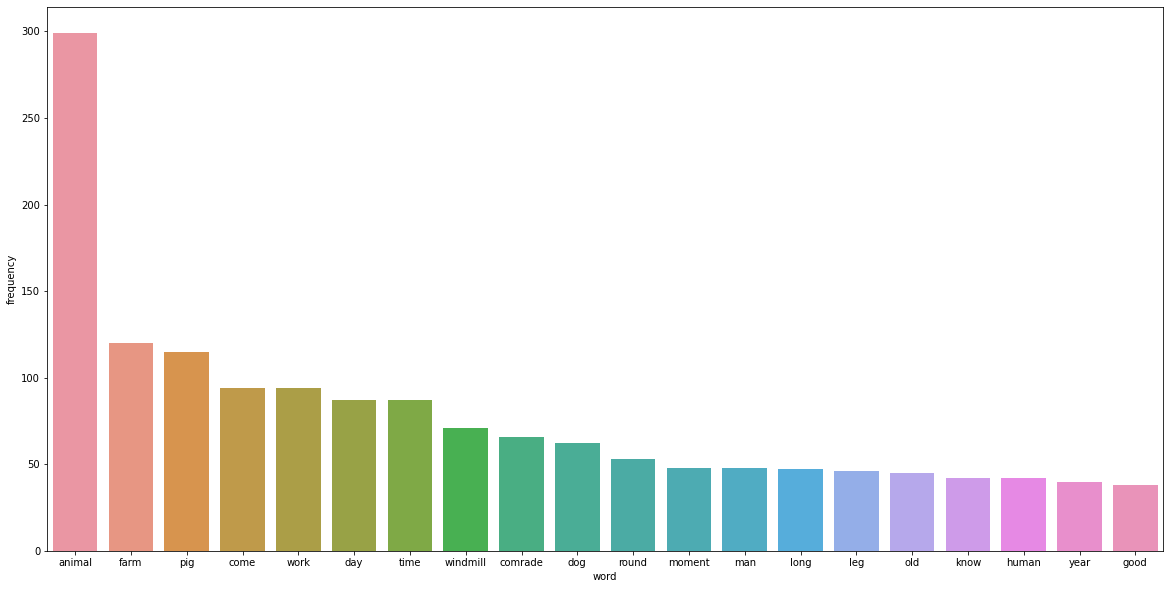

In [19]:
plt.figure(figsize=(20, 10))
sns.barplot(data=df.iloc[:20], x='word', y='frequency');

In [20]:
df_indexed = df.set_index('word')
df_indexed.head(20)

,frequency
word,
animal,299
farm,120
pig,115
come,94
work,94
day,87
time,87
windmill,71
comrade,66


In [21]:
wordcloud = WordCloud(width=1200, height=800, background_color='#FFFFFF').generate_from_frequencies(words)

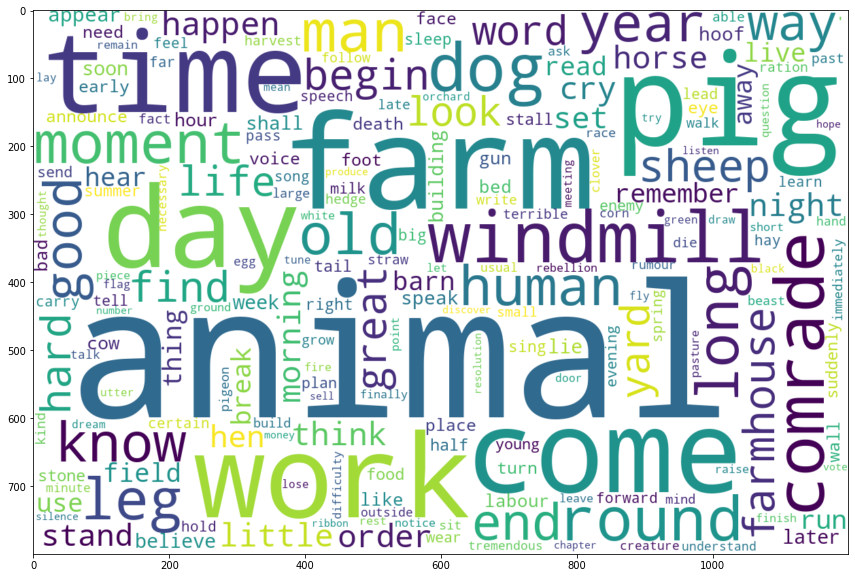

In [22]:
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')

### Try looking at word cloud for only Verbs

In [23]:
verbs = token_frequency(whole_text, only_include=['VERB'], verbos=False)

In [24]:
verbs

{'come': 93,
 'work': 42,
 'know': 42,
 'begin': 33,
 'find': 33,
 'happen': 30,
 'think': 29,
 'look': 27,
 'stand': 27,
 'remember': 26,
 'set': 26,
 'run': 26,
 'break': 26,
 'hear': 25,
 'live': 25,
 'read': 25,
 'appear': 25,
 'believe': 24,
 'speak': 23,
 'announce': 20,
 'lie': 19,
 'use': 19,
 'turn': 19,
 'cry': 19,
 'sing': 18,
 'lead': 17,
 'tell': 17,
 'wear': 17,
 'send': 17,
 'feel': 16,
 'pass': 16,
 'carry': 16,
 'learn': 16,
 'grow': 15,
 'die': 15,
 'write': 15,
 'follow': 15,
 'walk': 14,
 'ask': 14,
 'sleep': 14,
 'sit': 14,
 'build': 14,
 'understand': 13,
 'hold': 13,
 'raise': 12,
 'round': 12,
 'notice': 12,
 'finish': 12,
 'draw': 11,
 'lose': 11,
 'talk': 11,
 'lay': 11,
 'let': 11,
 'bring': 11,
 'remain': 11,
 'leave': 11,
 'listen': 10,
 'sell': 10,
 'discover': 10,
 'need': 10,
 'try': 10,
 'race': 10,
 'rush': 10,
 'utter': 10,
 'buy': 10,
 'meet': 9,
 'fall': 9,
 'continue': 9,
 'save': 9,
 'drink': 9,
 'forget': 9,
 'end': 9,
 'fling': 9,
 'gaze': 9,
 '

In [25]:
verbs_df = pd.DataFrame({'word':verbs.keys(), 'frequency':verbs.values()})
verbs_df

,word,frequency
0,come,93
1,work,42
2,know,42
3,begin,33
4,find,33
...,...,...
871,melt,1
872,publish,1
873,thank,1
874,download,1


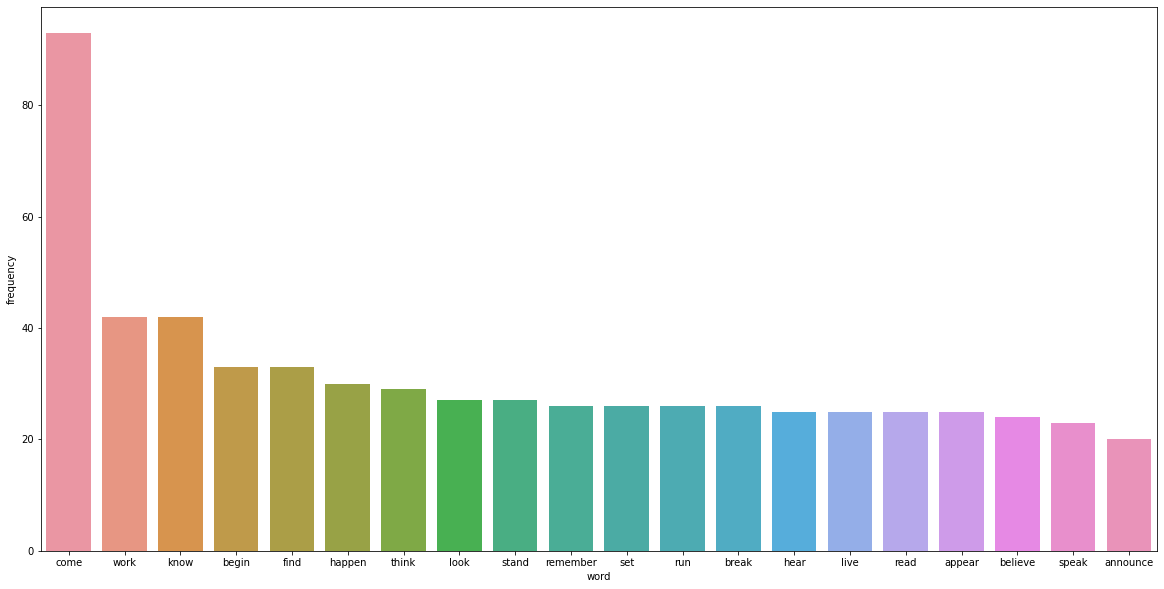

In [26]:
plt.figure(figsize=(20, 10))
sns.barplot(data=verbs_df.iloc[:20], x='word', y='frequency');

In [27]:
wordcloud = WordCloud(width=1200, height=800, background_color='#FFFFFF').generate_from_frequencies(verbs)

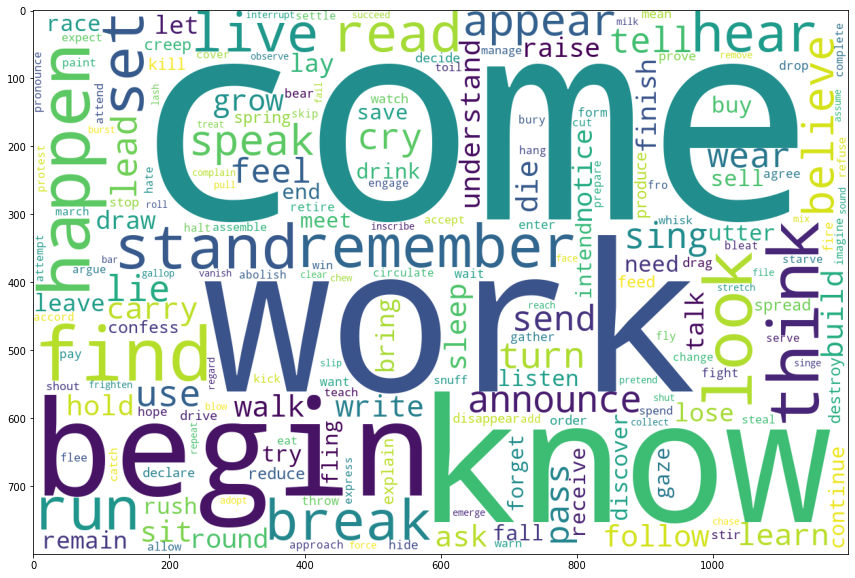

In [28]:
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud);

In [29]:
propns = token_frequency(whole_text, only_include=['PROPN'], verbos=False)

In [30]:
propns

{'Napoleon': 168,
 'Snowball': 126,
 'Boxer': 96,
 'Jones': 83,
 'Squealer': 57,
 'Farm': 54,
 'Animal': 49,
 'Mr.': 43,
 'Frederick': 34,
 'Clover': 33,
 'Benjamin': 31,
 'England': 28,
 'Pilkington': 28,
 'Comrade': 26,
 'Mollie': 20,
 'Sunday': 20,
 'Major': 19,
 'Rebellion': 18,
 'Whymper': 16,
 'Beasts': 15,
 'Foxwood': 15,
 'Seven': 14,
 'Muriel': 13,
 'Commandments': 13,
 'Battle': 13,
 'Willingdon': 12,
 'Man': 11,
 'Pinchfield': 11,
 'Moses': 10,
 'Cowshed': 9,
 'Animalism': 8,
 'Manor': 7,
 'd': 7,
 'Hero': 7,
 'Leader': 7,
 'van': 7,
 'Sugarcandy': 6,
 'Mountain': 6,
 'Class': 6,
 'Mrs.': 5,
 'geese': 5,
 'C': 5,
 'Commandment': 5,
 'Bluebell': 4,
 'Jessie': 4,
 'w': 4,
 'Meetings': 4,
 'al': 4,
 'white': 3,
 'S': 3,
 'Republic': 3,
 'Animals': 3,
 'Meeting': 3,
 'Committee': 3,
 'Sundays': 3,
 'January': 3,
 'y': 3,
 'Minimus': 3,
 'February': 3,
 'f': 3,
 'M': 2,
 'Pincher': 2,
 'goat': 2,
 'Old': 2,
 'Ireland': 2,
 'Hearken': 2,
 'March': 2,
 'Master': 2,
 'Midsummer': 2,

In [31]:
propn_df = pd.DataFrame({'word':propns.keys(), 'frequency':propns.values()})
propn_df

,word,frequency
0,Napoleon,168
1,Snowball,126
2,Boxer,96
3,Jones,83
4,Squealer,57
...,...,...
251,END,1
252,Julie,1
253,Global,1
254,Grey,1


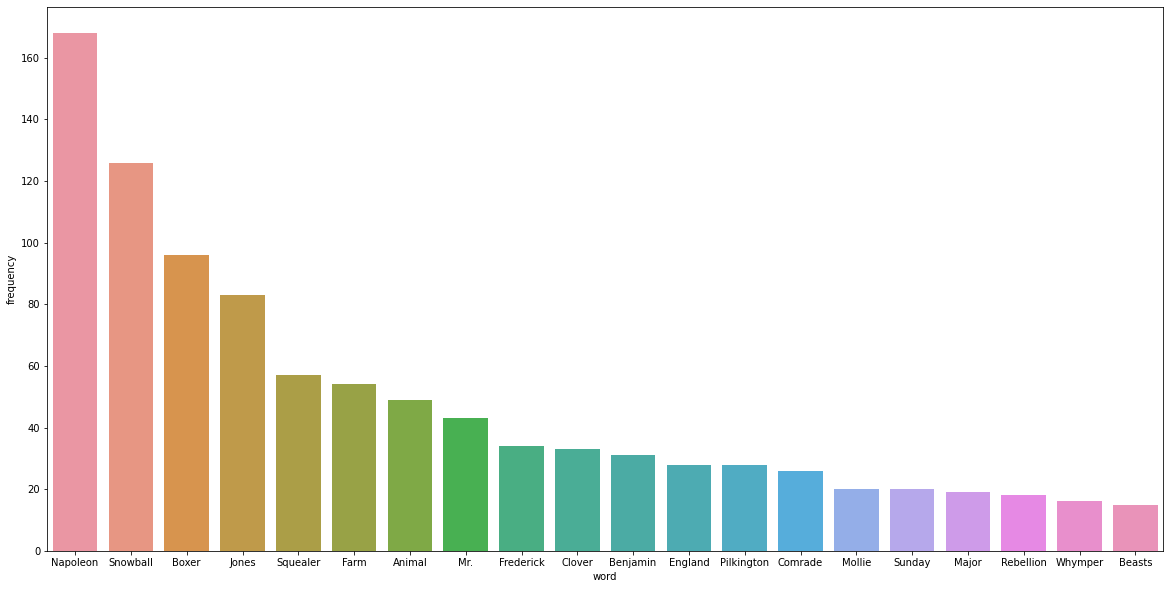

In [32]:
plt.figure(figsize=(20, 10))
sns.barplot(data=propn_df.iloc[:20], x='word', y='frequency');

In [33]:
wordcloud = WordCloud(width=1200, height=800, background_color='#FFFFFF').generate_from_frequencies(propns)

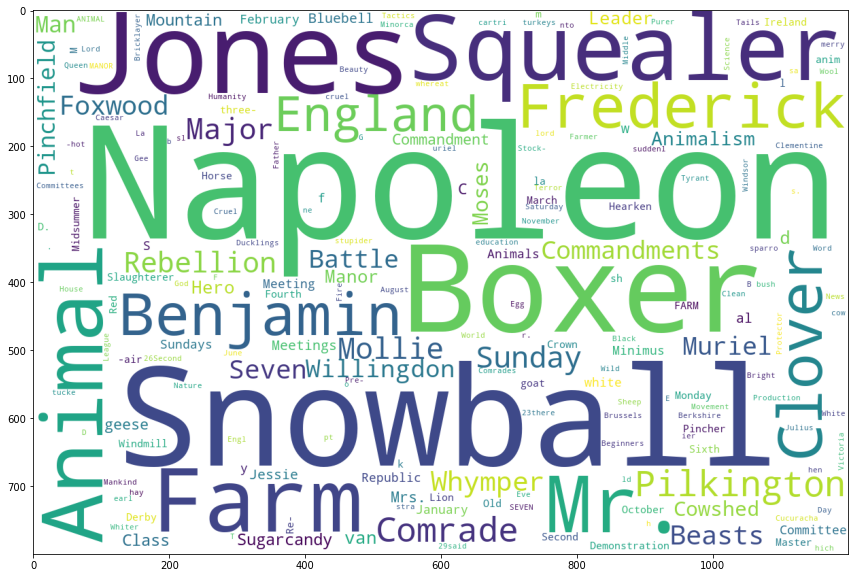

In [34]:
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud);

In [35]:
lemmas = []
for token in nlp(whole_text):
    if token.pos_ in ['PUNCT', 'NUM', 'SPACE']: continue
    if token.is_stop: continue
    lemmas.append(token.lemma_)

lemmas

['chapter',
 'M',
 'r.',
 'Jones',
 'Manor',
 'Farm',
 'lock',
 'hen',
 '-house',
 'night',
 'drunk',
 'remember',
 'shut',
 'pophole',
 'ring',
 'light',
 'lantern',
 'dancing',
 'lurch',
 'yard',
 'kick',
 'boot',
 'door',
 'draw',
 'glass',
 'beer',
 'barrel',
 'scullery',
 'way',
 'bed',
 'Mrs.',
 'Jones',
 'snore',
 'soon',
 'light',
 'bedroom',
 'go',
 'stirring',
 'fluttering',
 'farm',
 'building',
 'Word',
 'go',
 'round',
 'day',
 'old',
 'Major',
 'prize',
 'Middle',
 'White',
 'boar',
 'strange',
 'dream',
 'previous',
 'night',
 'wish',
 'communicate',
 'animal',
 'agree',
 'meet',
 'big',
 'barn',
 'soon',
 'Mr.',
 'Jones',
 'safely',
 'way',
 'old',
 'Major',
 'call',
 'exhibit',
 'Willingdon',
 'Beauty',
 'highly',
 'regard',
 'farm',
 'ready',
 'lose',
 'hour',
 'sleep',
 'order',
 'hear',
 'end',
 'big',
 'barn',
 'sort',
 'raise',
 'platform',
 'Major',
 'ensconce',
 'bed',
 'straw',
 'lantern',
 'hang',
 'beam',
 'year',
 'old',
 'lately',
 'grow',
 'stout',
 'majes

In [36]:
ld.ttr(lemmas)

0.2450918800062824

In [37]:
ld.msttr(lemmas, window_length=250)

0.75424

In [38]:
print(f'The size of tokens is {len(lemmas)}')

The size of tokens is 12734
